In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from calcul_structure import *

In [2]:
## Propriété materiaux [N, m]
E = 1
I = 1
A = 1

#Element 1
L=1

# Ligne Influence reaction RA
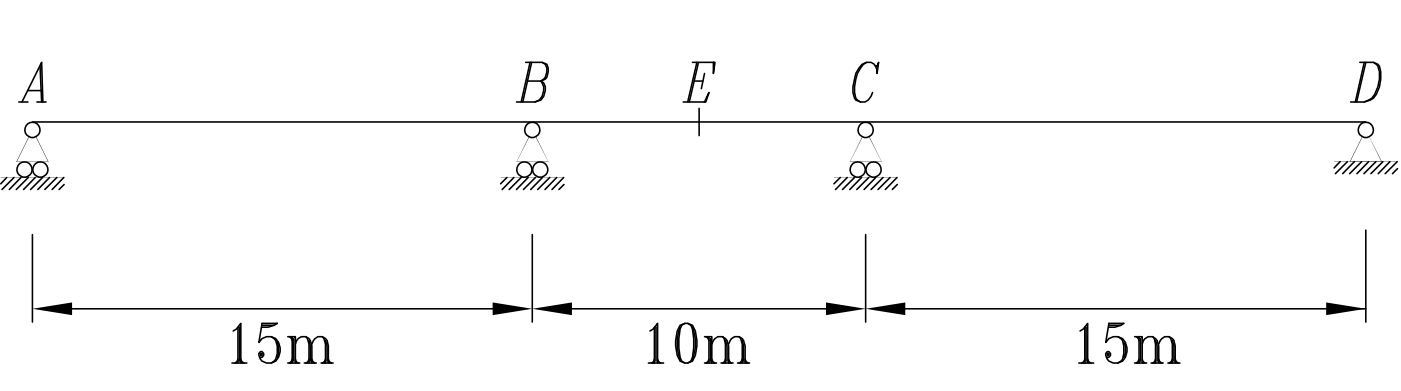

In [3]:
# Coordonnée éléments
XY = np.array([
     [0, 0], # Appui A
     [1, 0],
     [2, 0],
     [3, 0],
     [4, 0],
     [5, 0],
     [6, 0],
     [7, 0],
     [8, 0],
     [9, 0],
     [10,0],
     [11, 0],
     [12, 0],
     [13, 0],
     [14, 0],
     [15, 0], # Appui B
     [16, 0],
     [17, 0],
     [18, 0],
     [19, 0],
     [20,0], # Point E
     [21,0],
     [22,0],
     [23,0],
     [24,0],
     [25,0], # Appui C
     [26,0],
     [27,0],
     [28,0],
     [29,0],
     [30,0],
     [31,0],
     [32,0],
     [33,0],
     [34,0],
     [35,0],
     [36,0],
     [37,0],
     [38,0],
     [39,0],
     [40,0], # Appui D
])

In [4]:
#Matrice de rigidité élémentaire en coordonnées locales
# Discretisation de la poutre en 40 element de longeur 1 m
mat_elem_local_1 = matrice_elementaire(E, I, A, L) # Matrice de rigidité Element 1

print(mat_elem_local_1)

[[  1.   0.   0.  -1.   0.   0.]
 [  0.  12.   6.   0. -12.   6.]
 [  0.   6.   4.   0.  -6.   2.]
 [ -1.   0.   0.   1.   0.   0.]
 [  0. -12.  -6.   0.  12.  -6.]
 [  0.   6.   2.   0.  -6.   4.]]


In [5]:
#Matrice de rotatio
rot_elem_1 = rotation_matrice(0) # Rotation Element 1 à 40

In [6]:
#Matrice de rigidité élémentaire en coordonnées locales
mat_elem_global_1 = np.matmul(np.matmul(np.transpose(rot_elem_1),mat_elem_local_1), rot_elem_1) # Matrice de rigidité Element 1

In [7]:
# Connection entre élément
# Degré de liberte de chaque élément de la forme
# LM[:, i] = [Uxi, Uyi, Thetai, Uxj, Uyj, Thetaj]
# Travée 1
LM = np.zeros((6, 41), dtype=int)
LM[:,0] = [0, 1, 39, 0, 2, 40]
LM[:,1] = [0, 2, 40, 0, 3, 41]    
LM[:,2] = [0, 3, 41, 0, 4, 42]   
LM[:,3] = [0, 4, 42, 0, 5, 43]
LM[:,4] = [0, 5, 43, 0, 6, 44]   
LM[:,5] = [0, 6, 44, 0, 7, 45]
LM[:,6] = [0, 7, 45, 0, 8, 46]
LM[:,7] = [0, 8, 46, 0, 9, 47]
LM[:,8] = [0, 9, 47, 0, 10, 48]
LM[:,9] = [0, 10, 48, 0, 11, 49]
LM[:,10] = [0, 11, 49, 0, 12, 50]
LM[:,11] = [0, 12, 50, 0, 13, 51]
LM[:,12] = [0, 13, 51, 0, 14, 52]
LM[:,13] = [0, 14, 52, 0, 15, 53]
LM[:,14] = [0, 15, 53, 0, 0, 54]

#Travée 2
LM[:,15] = [0, 0, 54, 0, 16, 55]
LM[:,16] = [0, 16, 55, 0, 17, 56]
LM[:,17] = [0, 17, 56, 0, 18, 57]
LM[:,18] = [0, 18, 57, 0, 19, 58]
LM[:,19] = [0, 19, 58, 0, 20, 59]
LM[:,20] = [0, 20, 59, 0, 21, 60]
LM[:,21] = [0, 21, 60, 0, 22, 61]
LM[:,22] = [0, 22, 61, 0, 23, 62]
LM[:,23] = [0, 23, 62, 0, 24, 64]
LM[:,24] = [0, 24, 63, 0, 0, 64]

#Travée 3
LM[:,25] = [0, 0, 64, 0, 25, 65]
LM[:,26] = [0, 25,65, 0, 26, 66]
LM[:,27] = [0, 26,66, 0, 27, 67]
LM[:,28] = [0, 27,67, 0, 28, 68]
LM[:,29] = [0, 28,68, 0, 29, 69]
LM[:,30] = [0, 29,69, 0, 30, 70]
LM[:,31] = [0, 30,70, 0, 31, 71]
LM[:,32] = [0, 31,71, 0, 32, 72]
LM[:,33] = [0, 32,72, 0, 33, 73]
LM[:,34] = [0, 33,73, 0, 34, 74]
LM[:,35] = [0, 34,74, 0, 35, 75]
LM[:,36] = [0, 35,75, 0, 36, 76]
LM[:,37] = [0, 36,76, 0, 37, 77]
LM[:,39] = [0, 37,77, 0, 38, 78]
LM[:,40] = [0, 38,78, 0, 0, 79]

print(LM)


[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15  0 16 17 18 19 20 21 22 23
  24  0 25 26 27 28 29 30 31 32 33 34 35 36  0 37 38]
 [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
  63 64 65 66 67 68 69 70 71 72 73 74 75 76  0 77 78]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15  0 16 17 18 19 20 21 22 23 24
   0 25 26 27 28 29 30 31 32 33 34 35 36 37  0 38  0]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 64
  64 65 66 67 68 69 70 71 72 73 74 75 76 77  0 78 79]]


In [8]:
# Assemblage de la matrice de rigidité
K_global_2 = np.zeros((79, 79), dtype=np.float32)

for i in range(41):
    K_global_2 = assemblage_matrice_rigidite(LM, i, K_global_2, mat_elem_global_1)

print(K_global_2.shape)
np.linalg.inv(K_global_2)

(79, 79)


array([[1795.8884   , 1638.8292   , 1482.77     , ...,   -7.720852 ,
          -8.047085 ,   -8.155829 ],
       [1638.8292   , 1499.0851   , 1359.5076   , ...,   -7.2061286,
          -7.510613 ,   -7.6121078],
       [1482.77     , 1359.5076   , 1236.2451   , ...,   -6.6914053,
          -6.9741406,   -7.0683856],
       ...,
       [  -7.720852 ,   -7.2061286,   -6.6914053, ...,    2.513154 ,
           2.3813155,    2.3373692],
       [  -8.047085 ,   -7.510613 ,   -6.9741406, ...,    2.3813155,
           3.2481315,    3.203737 ],
       [  -8.155829 ,   -7.6121078,   -7.0683856, ...,    2.3373692,
           3.203737 ,    4.159193 ]], dtype=float32)

In [9]:
#Vecteur de Force Nodale
P_global    = np.zeros(79)
P_global[0] = 1
print(P_global)
print(P_global.shape)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
(79,)


In [10]:
#Solution 
U = np.linalg.solve(K_global_2, P_global)
print(U)

[ 1.79588845e+03  1.63882922e+03  1.48276999e+03  1.32871076e+03
  1.17765153e+03  1.03059230e+03  8.88533072e+02  7.52473842e+02
  6.23414611e+02  5.02355381e+02  3.90296151e+02  2.88236921e+02
  1.97177691e+02  1.18118460e+02  5.20592302e+01 -3.75302691e+01
 -6.18867713e+01 -7.48957399e+01 -7.83834081e+01 -7.41760090e+01
 -6.40997758e+01 -4.99809417e+01 -3.36457399e+01 -1.69204036e+01
  1.47167414e+01  2.63886398e+01  3.52331839e+01  4.14678625e+01
  4.53101644e+01  4.69775785e+01  4.66875934e+01  4.46576981e+01
  4.11053812e+01  3.62481315e+01  3.03034380e+01  2.34887892e+01
  1.60216741e+01  8.11958146e+00 -1.57225897e+02 -1.56725897e+02
 -1.55225897e+02 -1.52725897e+02 -1.49225897e+02 -1.44725897e+02
 -1.39225897e+02 -1.32725897e+02 -1.25225897e+02 -1.16725897e+02
 -1.07225897e+02 -9.67258969e+01 -8.52258969e+01 -7.27258969e+01
 -5.92258969e+01 -4.47258969e+01 -3.06390135e+01 -1.83783632e+01
 -7.94394619e+00  6.64237668e-01  7.44618834e+00  1.24019058e+01
  1.55313901e+01  1.68346

In [11]:
# Line d'Influence Muller-Breslaut
R1 = U[0]
print(R1)

LI  = U/R1
print(LI.shape)


1795.888452914791
(79,)


[ 1.          0.91254511  0.82564704  0.73986263  0.65574871  0.57386209
  0.49475961  0.4189981   0.34713437  0.27972527  0.21732761  0.16049823
  0.10979395  0.0657716   0.02898801  0.         -0.03446025 -0.041704
 -0.04364603 -0.04130324 -0.03569252 -0.02783076 -0.01873487 -0.00942175
  0.00819469  0.01469392  0.0196188   0.02309044  0.02522994  0.02615841
  0.02599693  0.02486663  0.0228886   0.02018395  0.01687379  0.0130792
  0.00892131  0.00452121  0.          0.          0.        ]


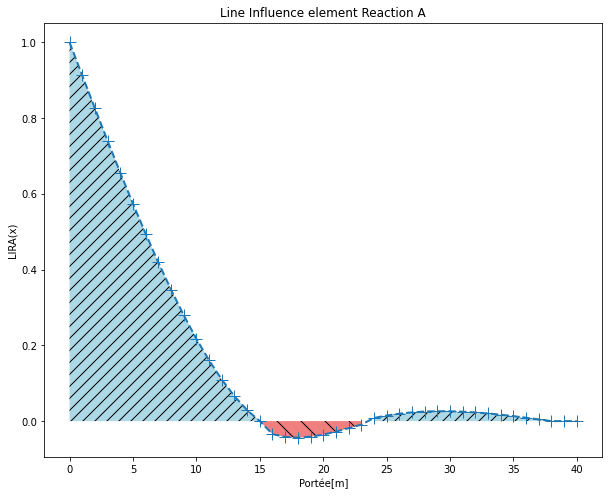

In [13]:
# Tracée ligne Influence
# Create the scatter plot
scale_factor = 1
x = scale_factor*XY[:, 0]
y = np.zeros((41,))
# Noeud 0, 1, 2
y[0:16] = LI[0:16]
# Noeud 3 : Reaction appui, valeur deplacement vertical 0 
y[15] = 0
# Noeud 4 : Point E
y[16:25] = LI[16:25]
# Noeud 5, 6
y[25:38] = LI[25:38]
# Noeud 7 reaction appui 0

print(y)

plt.figure(figsize=(10,8))
plt.plot(x, y, '+--', linewidth=2, markersize=12)
# Fill the area above the line with a hashed pattern
plt.fill_between(x, y, np.zeros_like(y), where=(y >= 0), facecolor='lightblue', hatch='//')

# Fill the area below the line with a different hashed pattern
plt.fill_between(x, y, np.zeros_like(y), where=(y <= 0),  facecolor='lightcoral', hatch='\\')

# Add labels and title
plt.xlabel("Portée[m]")
plt.ylabel("LIRA(x)")
plt.title("Line Influence element Reaction A")

# Show the plot
plt.show()